## 빅데이터 실습

### COVID19 코로나 바이러스의 영향으로 중국인 관광객 수 감소 분석

#### 중간저장 엑셀파일 로드

In [1]:
# 판다스 사용등록
import pandas as pd

In [4]:
## 데이터 로드
df_total = pd.read_excel('../day03/data/kto_sample.xlsx')
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,22.9
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,4.0
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,1.6
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,1.5
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0


In [6]:
condition = df_total['국적'] == '중국'

In [7]:
df_china = df_total[condition]

In [9]:
df_china.reset_index(inplace=True) # 인덱스가 17,77, 137 등으로 진행되는것을 0부터 순차적으로 변경

In [10]:
df_china

,index,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,4.6
1,77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,6.9
2,137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,5.7
3,197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,9.5
4,257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...
120,7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,44.5
121,7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,5.6
122,7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,0.6
123,7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,0.1


## 시각화

In [11]:
# 필요 라이브러리, 모듈 사용등록
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 한글 깨짐 해결
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # 나눔고딕코딩 사용
font = font_manager.FontProperties(fname = font_path).get_name() # 실제 설치된 폰트 이름조회
rc('font', family=font) # 한글깨짐현상 해결
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스 표시 깨짐 해결

In [13]:
# 차트 스타일 설정
sns.set_style('darkgrid')

In [14]:
# 불필요한 경고메시지 제거
import warnings
warnings.filterwarnings('ignore')

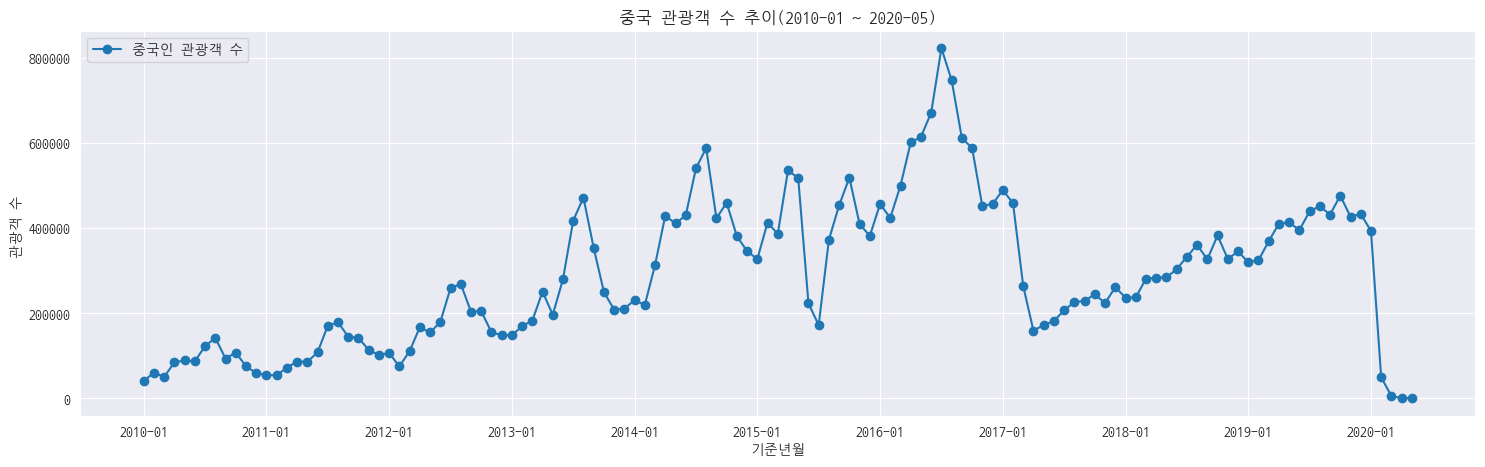

In [22]:
# 중국인 관광객 수 차트 다시
plt.figure(figsize=(18, 5))
plt.plot(df_china['기준년월'], df_china['관광'], label='중국인 관광객 수', marker='o')
plt.title('중국 관광객 수 추이(2010-01 ~ 2020-05)')
plt.xlabel('기준년월')
plt.ylabel('관광객 수 ')
plt.legend(loc='upper left')
plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)]) 

plt.show()

##### 관광객 수 TOP5 국가 시각화

In [23]:
coutryList = ['중국','일본','대만','미국','홍콩']

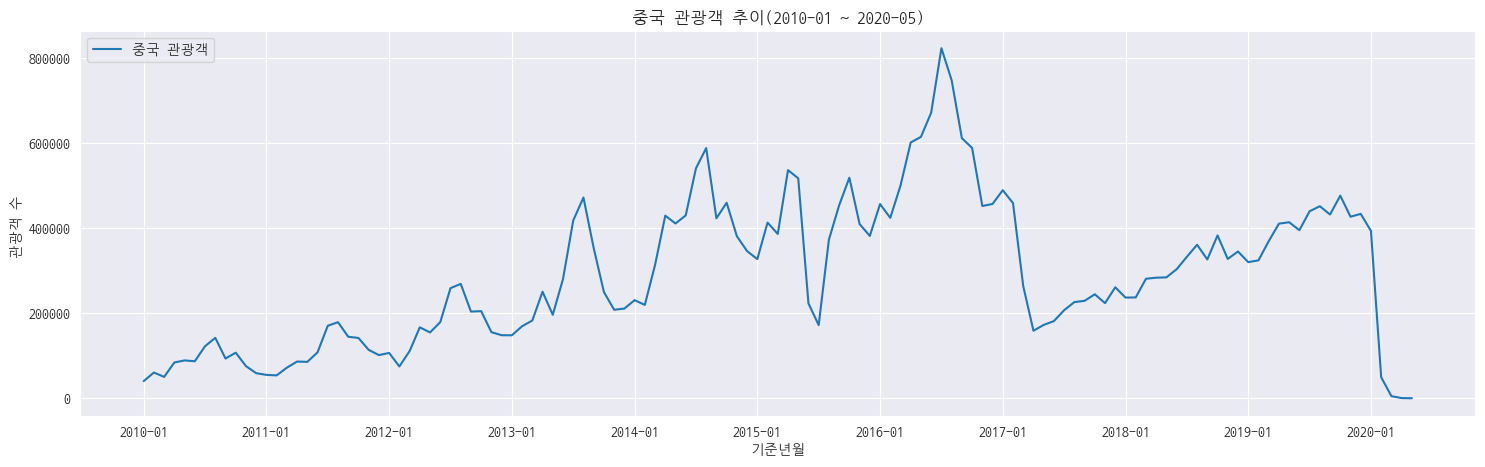

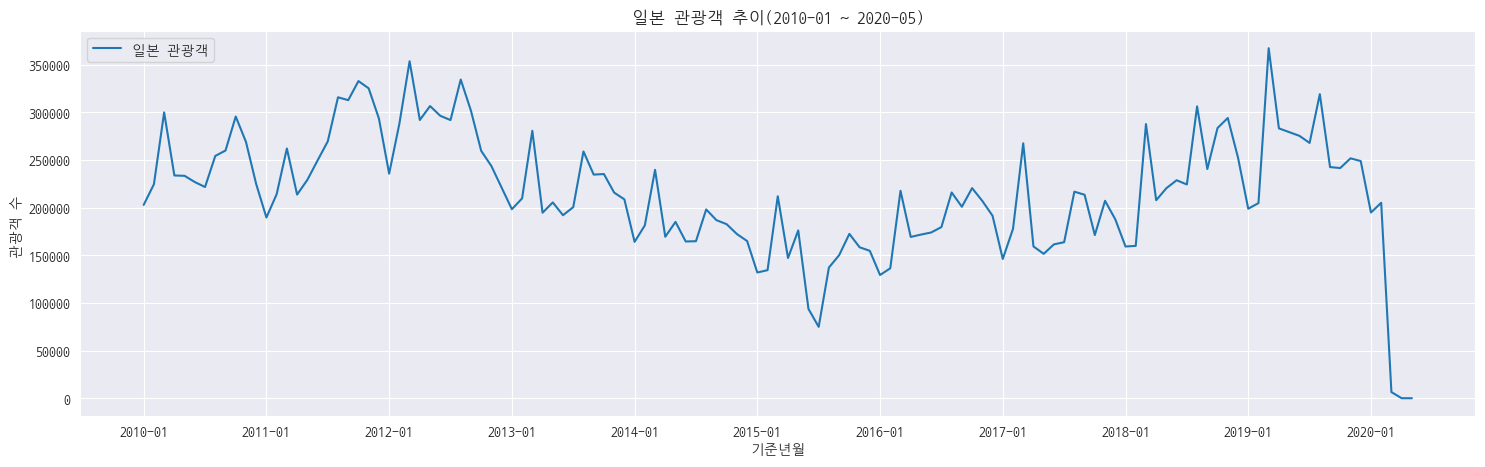

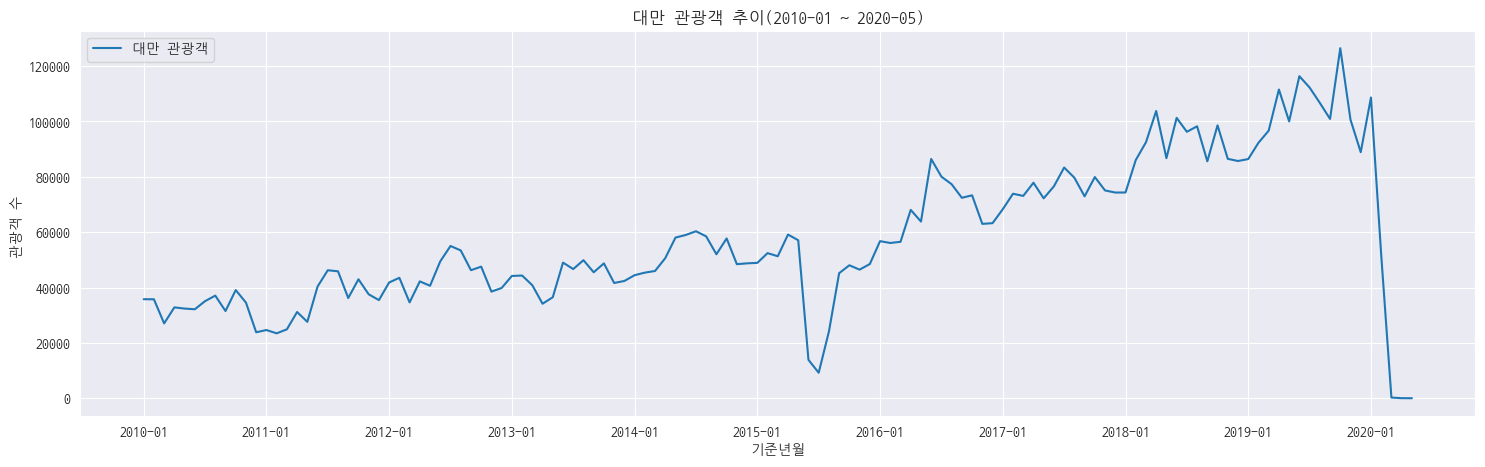

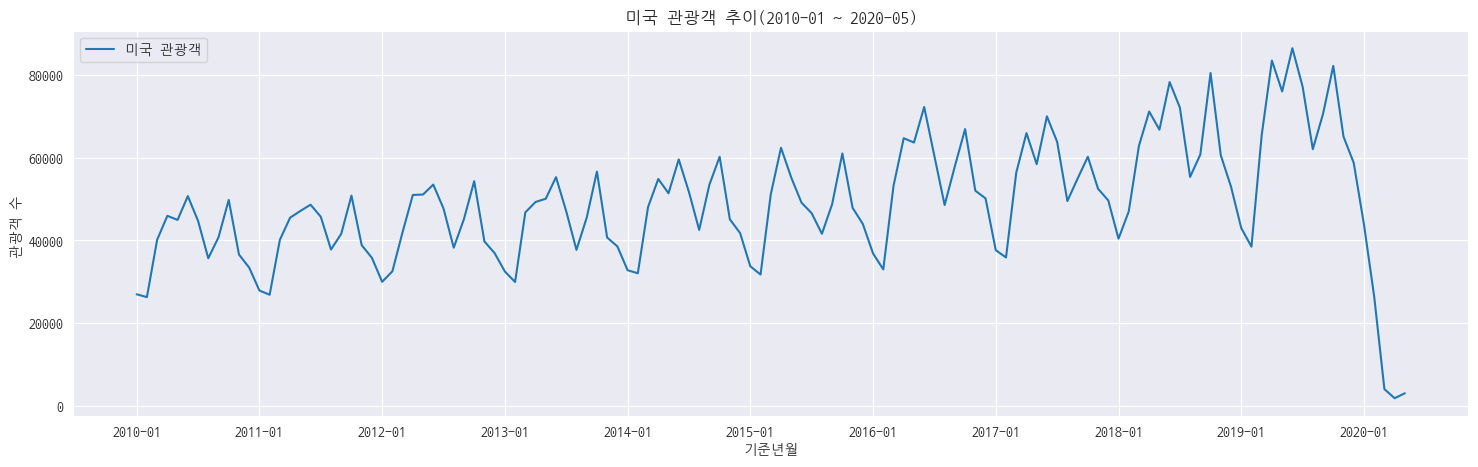

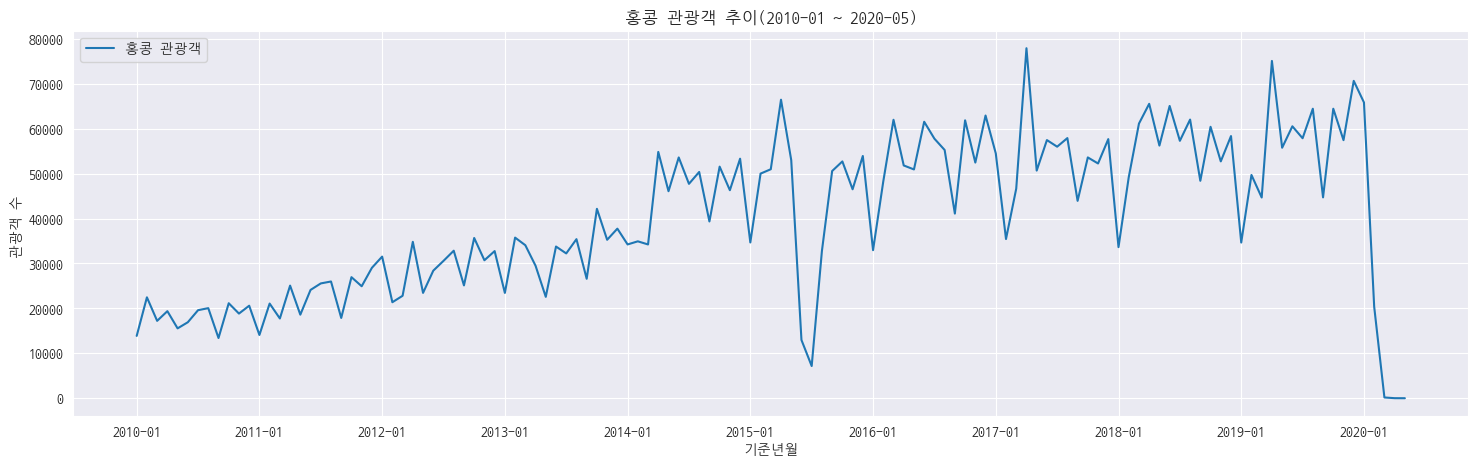

In [25]:
for country in coutryList:
    # 각 나라별 관광객 수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]
    
    plt.figure(figsize=(18, 5))

    plt.plot(df_filter['기준년월'], df_filter['관광'], label=f'{country} 관광객')
    plt.title(f'{country} 관광객 추이(2010-01 ~ 2020-05)')
    plt.xlabel('기준년월')
    plt.ylabel('관광객 수 ')
    plt.legend(loc='upper left')
    plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])

    plt.show()

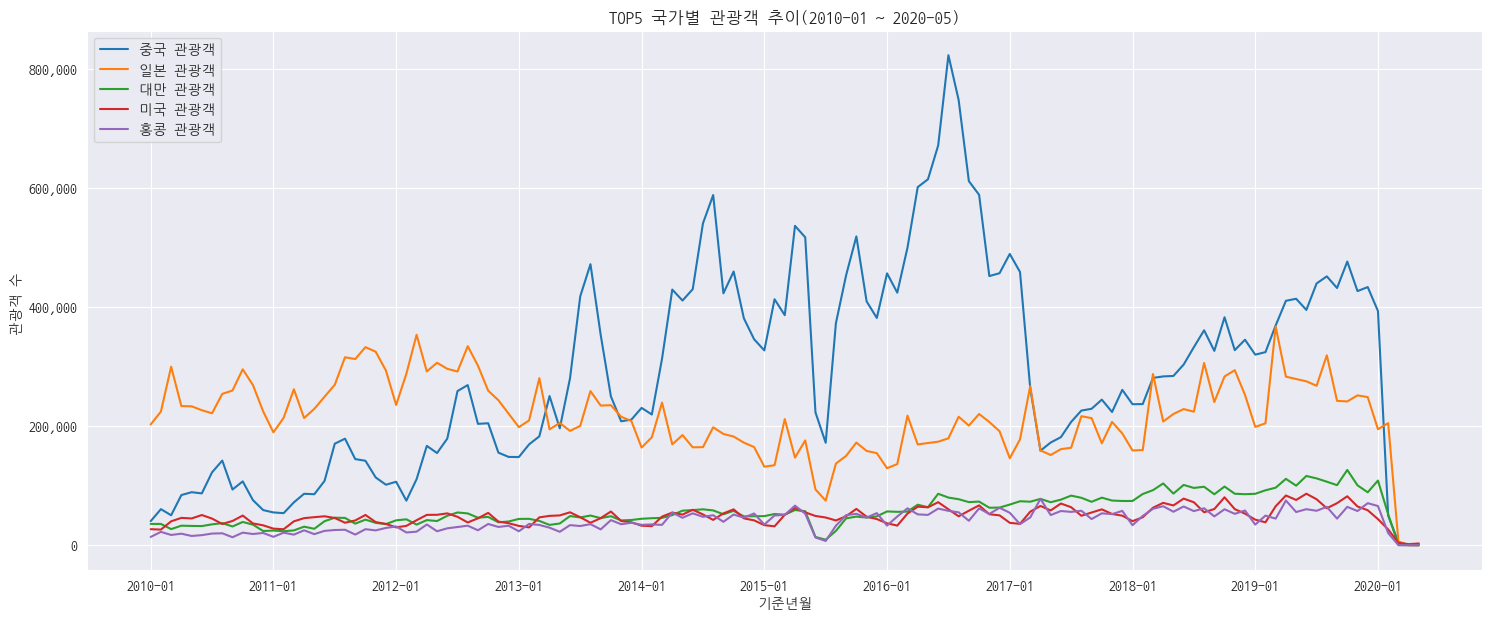

In [32]:
plt.figure(figsize=(18, 7))

for country in coutryList:
    # 각 나라별 관광객 수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]

    plt.plot(df_filter['기준년월'], df_filter['관광'], label=f'{country} 관광객')
    plt.xlabel('기준년월')
    plt.ylabel('관광객 수 ')
    plt.legend(loc='upper left')
    plt.xticks([f'{yyyy}-01' for yyyy in range(2010, 2021)])

plt.title(f'TOP5 국가별 관광객 추이(2010-01 ~ 2020-05)')
# y축 관광객 수 1,000 단위마다 쉼표가 찍히도록 설정
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}' for x in current_values]) 
plt.show()

##### 히트맵

연도와 월이 현재 하나의 컬럼으로 구성되어있으나, 히트맵으로 사용 시 연도와 월을 분리

In [33]:
df_total

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,22.9
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,4.0
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,1.6
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,1.5
...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0


In [35]:
## 연도, 월 분리 / '2010-01' slice(0, 4):2010, slice(5,7):01
# df_total['기준년월'].split('-') 데이터타입이 문자열이 아닌 시리즈 객체라 안됨 !
df_total['년도'] = df_total['기준년월'].str.slice(0, 4)
df_total['월'] = df_total['기준년월'].str.slice(5, 7)

In [36]:
df_total # 마지막에 년도, 월 컬럼이 각각 생성된것을 확인할 수 있음.

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,22.9,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,4.0,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,1.6,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,1.5,2010,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,대양주 기타,1,0,1,0,3,5,2020-05,오세아니아,20.0,0.0,2020,05
7496,남아프리카공화국,1,0,3,0,25,29,2020-05,아프리카,3.4,0.0,2020,05
7497,아프리카 기타,3,1,3,6,118,131,2020-05,아프리카,2.3,0.0,2020,05
7498,국적미상,1,0,0,0,3,4,2020-05,기타대륙,25.0,0.0,2020,05


In [38]:
condition = df_total['국적'] == '중국'
df_china = df_total[condition]

In [39]:
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,4.6,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,6.9,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,5.7,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,9.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,10.1,2010,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,44.5,2020,01
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,5.6,2020,02
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,0.6,2020,03
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,0.1,2020,04


In [47]:
## 피벗테이블로 구성
df_chinaPivot = df_china.pivot_table(values='관광', index='년도', columns='월', aggfunc='sum')

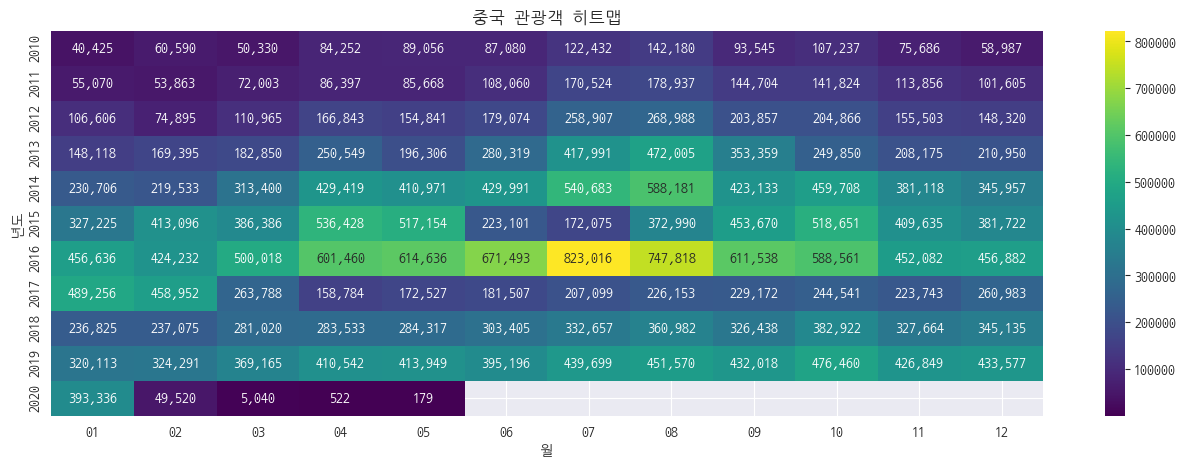

In [58]:
## 히트맵
plt.figure(figsize=(16, 5))
# annot == annotation(주석),
# fmt = '.0f' 소수점 삭제 옵션
ax = sns.heatmap(df_chinaPivot, annot=True, fmt='.0f',cmap='viridis') # 8행 간소화를 위해 실행
plt.title('중국 관광객 히트맵')

for i in ax.texts:
    i.set_text(f'{int(i.get_text()):,d}') # 1,000단위 쉼표 표시
plt.show()

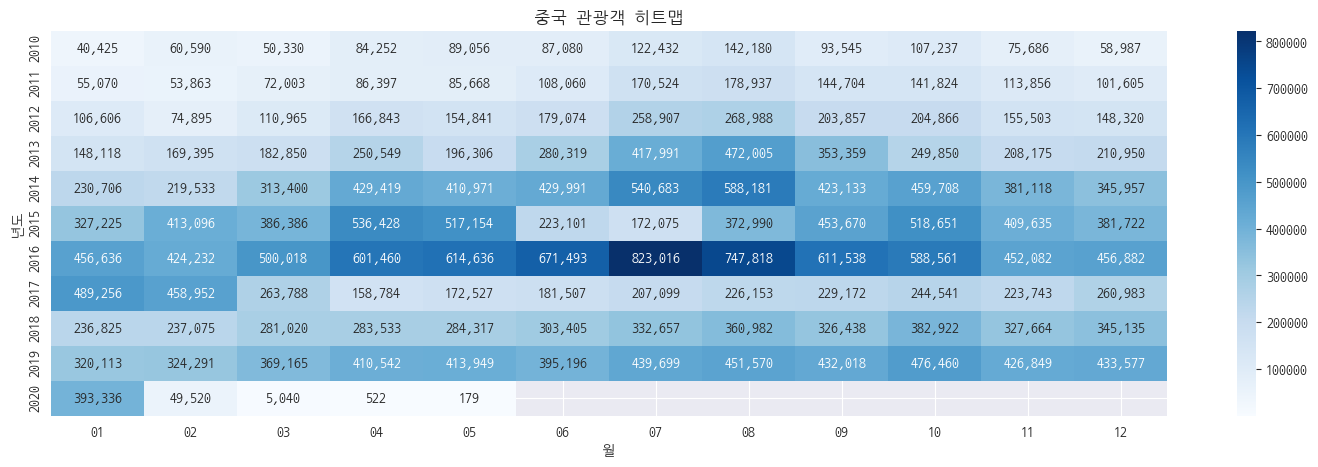

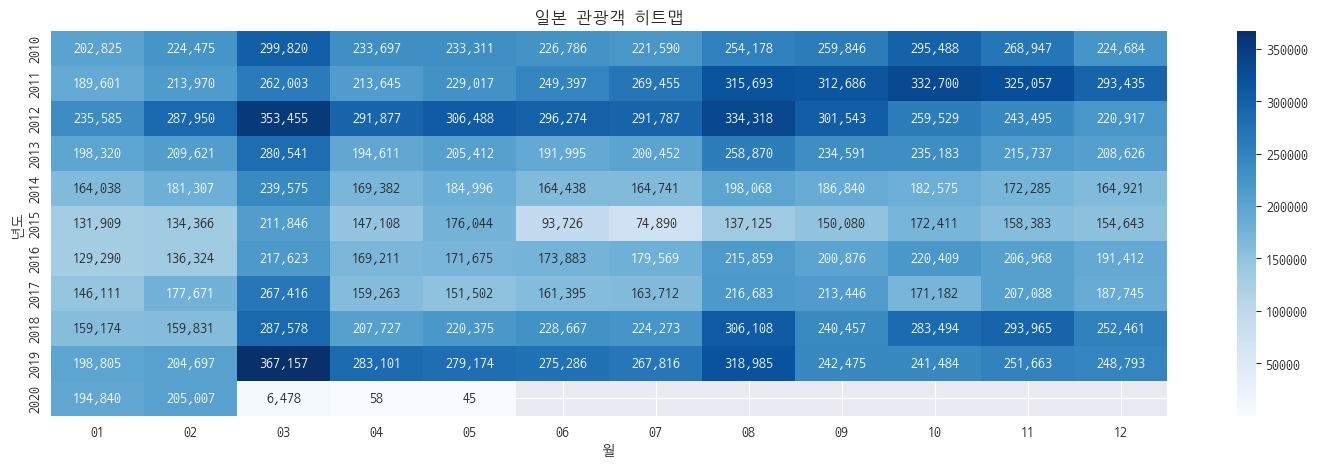

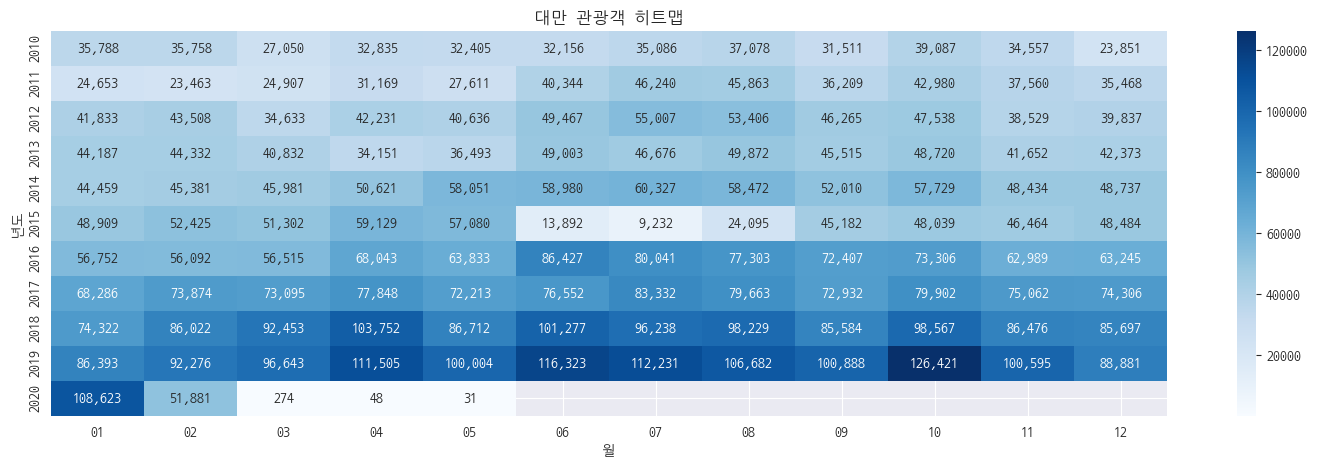

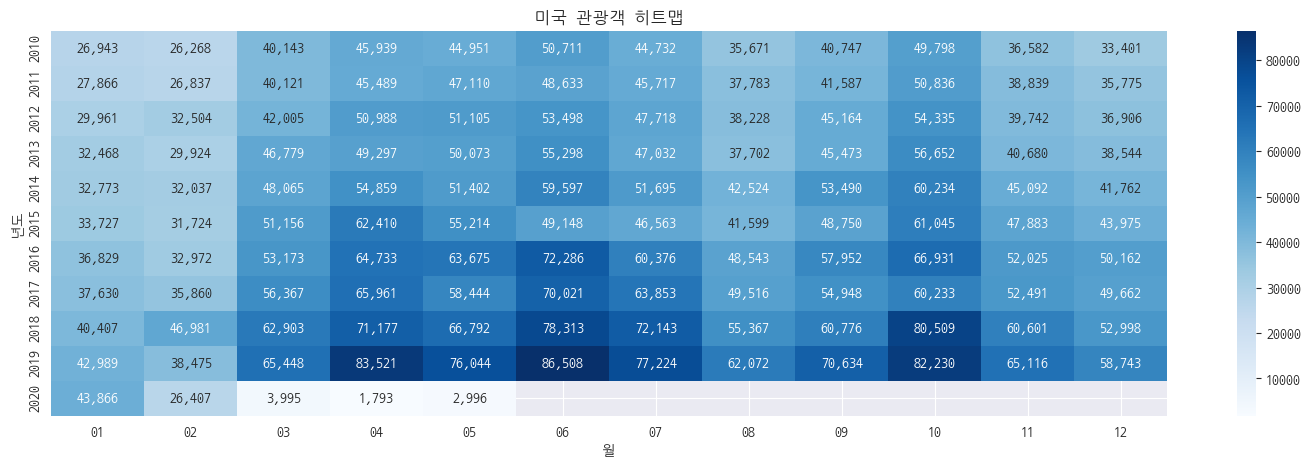

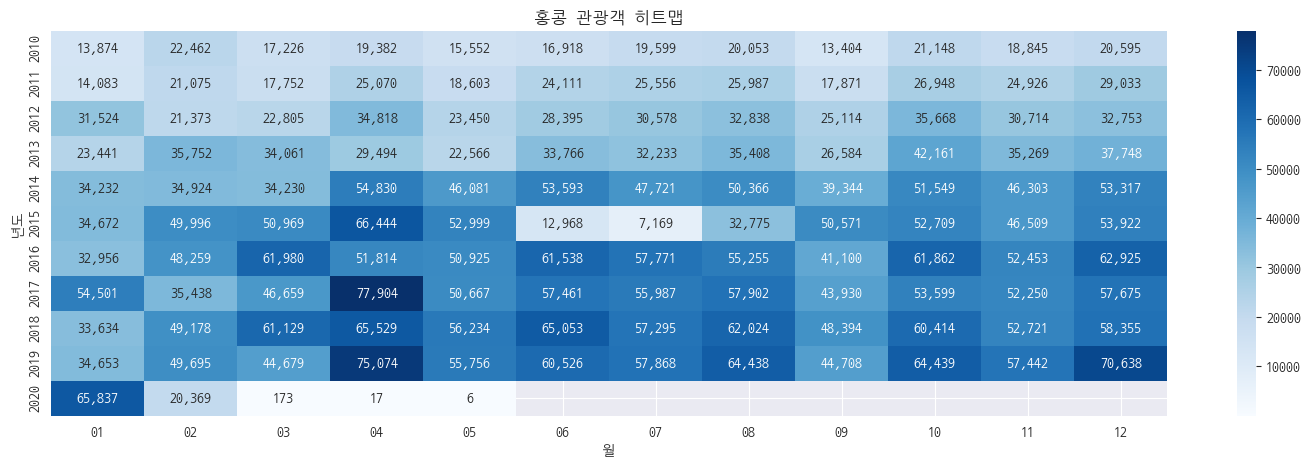

In [62]:
for country in ['중국','일본','대만','미국','홍콩']:
    # 각 나라별 관광객 수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]
    
    plt.figure(figsize=(18, 5))
    df_pivot = df_filter.pivot_table(values='관광', index='년도', columns='월', aggfunc='sum')
    
    ax = sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='Blues')
    plt.title(f'{country} 관광객 히트맵')

    for t in ax.texts:
        t.set_text(f'{int(t.get_text()):,d}')

    plt.show()

##### 시각화 차트, 히트맵으로 분석

- 2010년 이후로 꾸준히 증가
- 2017년 초 대폭 감소
- 여름에 관광객 수 피크. 단, 2015년 여름만 대폭 감소
- 2020년 초 관광객 수 급감

##### 인터넷 검색 > 구글링
1. 2015년 여름 관광객 수 감소 이유 검색, '중국인 관광객' 검색, 도구 > 기간 설정 날짜
    - 메르스 발병으로 인한 관광객 감소, Top5 미국 외 모든 국가에서 동일하게 나타남
2. 2017년 중국 관광객 감소
    - 사드(THAAD) 한국 내 배치에 대한 보복성 배척
    - 중국을 제외한 Top5 국가들은 큰 영향 없음
3. 2020년 3월부터 관광객 급감
    - 코로나 바이러스 창궐로 인한 감소, 모든 국가가 동일